In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.utils.data
from torch import nn
from torch.nn import functional as F

import seaborn as sns

from model import end2end_kernel
from model import end2end_crps

import tqdm

import os

torch.manual_seed(1)
np.random.seed(1)

%load_ext autoreload
%autoreload 2

In [2]:
def featurize(x):
    return torch.cat([x[:, None], x[:, None]**2], dim=1)

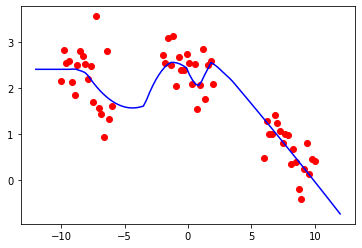

In [3]:
arr = np.load("data.npz") 
x = torch.from_numpy(arr['x'])
f = featurize(x)
y = torch.from_numpy(arr['y']) * 10

x_ = torch.from_numpy(arr['x_'])
f_ = featurize(x_)
y_ = torch.from_numpy(arr['y_']) * 10

plt.plot(x.data.numpy(), y.data.numpy(), "ro")
plt.plot(x_.data.numpy(), y_.data.numpy(), "-b")

In [4]:
end2end_model = end2end_kernel.train_model_kernel(x.reshape(-1, 1), y, n_epoch = 1000, hidden_layers = [10, 10, 10], learning_rate = 0.004, exp_decay = 1)

initial loss:  5.267550945281982
final loss:  -0.9473854899406433


(-1.0, 4.0)

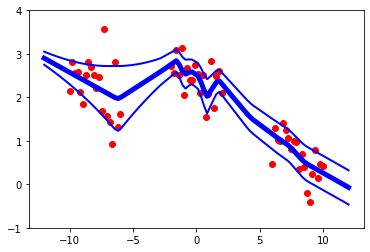

In [5]:
pred_mean, pred_var, _ = end2end_model(x_.reshape(-1, 1))
pred_std = torch.sqrt(pred_var)
pred_upper = pred_mean + pred_std
pred_lower = pred_mean - pred_std

plt.plot(x.data.numpy(), y.data.numpy(), "ro")
# plt.plot(x_.data.numpy(), y_.data.numpy(), "--k")
plt.plot(x_.data.numpy(), pred_mean.detach().numpy(), "-b", lw=5)
plt.plot(x_.data.numpy(), pred_lower.detach().numpy(), "-b", lw=2)
plt.plot(x_.data.numpy(), pred_upper.detach().numpy(), "-b", lw=2)
plt.ylim(-1, 4)

In [6]:
end2end_model = end2end_crps.train_model_nllk(x.reshape(-1, 1), y, n_epoch = 1000, hidden_layers = [10, 10, 10], learning_rate = 0.004, exp_decay = 1)

initial loss:  13.876880645751953
final loss:  -0.8707781434059143


(-1.0, 4.0)

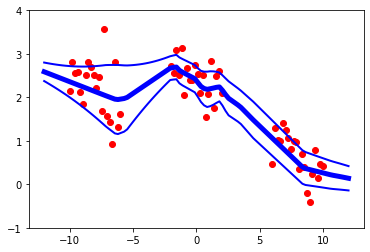

In [7]:
pred_mean, pred_var = end2end_model(x_.reshape(-1, 1))
pred_std = torch.sqrt(pred_var)
pred_upper = pred_mean + pred_std
pred_lower = pred_mean - pred_std

plt.plot(x.data.numpy(), y.data.numpy(), "ro")
# plt.plot(x_.data.numpy(), y_.data.numpy(), "--k")
plt.plot(x_.data.numpy(), pred_mean.detach().numpy(), "-b", lw=5)
plt.plot(x_.data.numpy(), pred_lower.detach().numpy(), "-b", lw=2)
plt.plot(x_.data.numpy(), pred_upper.detach().numpy(), "-b", lw=2)
plt.ylim(-1, 4)